In [42]:
import pandas as pd
df = pd.read_csv("Titanic.csv")
df

,last,first,gender,age,class,fare,embarked,survived
0,Braund,Mr. Owen Harris,M,22.0,3,7.2500,Southampton,no
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes
2,Heikkinen,Miss Laina,F,26.0,3,7.9250,Southampton,yes
3,Futrelle,Mrs. Jacques Heath (Lily May Peel),F,35.0,1,53.1000,Southampton,yes
4,Allen,Mr. William Henry,M,35.0,3,8.0500,Southampton,no
...,...,...,...,...,...,...,...,...
886,Montvila,Rev. Juozas,M,27.0,2,13.0000,Southampton,no
887,Graham,Miss Margaret Edith,F,19.0,1,30.0000,Southampton,yes
888,Johnston,"Miss Catherine Helen ""Carrie""",F,NaN,3,23.4500,Southampton,no
889,Behr,Mr. Karl Howell,M,26.0,1,30.0000,Cherbourg,yes


In [47]:
df.shape

(891, 8)

In [48]:
df.duplicated().sum()

0

In [49]:
df.duplicated(['age','fare']).sum()

180

In [50]:
df.isnull().values.any()

True

In [51]:
df['survived'].isnull().values.any()

False

<AxesSubplot:xlabel='gender'>

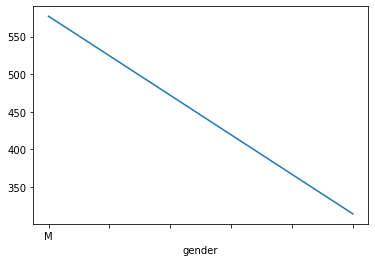

In [54]:
#df['gender'].value_counts().plot().bar()
#df.value_counts()
#df['gender'].value_counts().plot.bar()
#df.value_counts('gender').plot()

<AxesSubplot:>

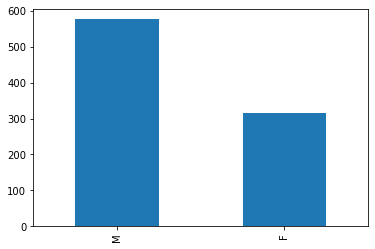

In [22]:
df['gender'].value_counts().plot.bar()

In [24]:
df.value_counts()

last          first                      gender  age   class  fare      embarked     survived
van Billiard  Mr. Austin Blyler          M       40.5  3      14.5000   Southampton  no          1
Emanuel       Miss Virginia Ethel        F       5.0   3      12.4750   Southampton  yes         1
Frolicher     Miss Hedwig Margaritha     F       22.0  1      49.5000   Cherbourg    yes         1
Frauenthal    Dr. Henry William          M       50.0  1      133.6500  Southampton  yes         1
Francatelli   Miss Laura Mabel           F       30.0  1      56.9292   Cherbourg    yes         1
                                                                                                ..
Nasser        Mr. Nicholas               M       32.5  2      30.0708   Cherbourg    no          1
Nakid         Mr. Sahid                  M       20.0  3      15.7417   Cherbourg    yes         1
               Miss Maria ("Mary")       F       1.0   3      15.7417   Cherbourg    yes         1
Najib          

In [31]:
df.isnull().sum()

last          0
first         0
gender        0
age         177
class         0
fare          0
embarked      0
survived      0
dtype: int64

In [94]:
df[(df.gender == 'M') & (df.survived == 'no') & (df.class == 1)]

SyntaxError: invalid syntax (<ipython-input-94-19ad4e03de59>, line 1)

In [58]:
df['gender'].value_counts()

M    577
F    314
Name: gender, dtype: int64

In [32]:
df.value_counts(["gender", "class"])

gender  class
M       3        347
F       3        144
M       1        122
        2        108
F       1         94
        2         76
dtype: int64

In [33]:
df.value_counts(["gender", "survived"])

gender  survived
M       no          468
F       yes         233
M       yes         109
F       no           81
dtype: int64

In [40]:
df.value_counts(["survived","embarked"])

survived  embarked   
no        Southampton    427
yes       Southampton    219
          Cherbourg       93
no        Cherbourg       75
          Queenstown      47
yes       Queenstown      30
dtype: int64

In [39]:
import pandas as pd
from pandasql import sqldf
dataframe = pd.read_csv("https://web.stanford.edu/class/cs102/datasets/Titanic.csv")
print(sqldf("select * from dataframe where gender='M' and survived = 'yes';"))

         last                  first gender   age  class     fare  \
0    Williams     Mr. Charles Eugene      M   NaN      2  13.0000   
1     Beesley           Mr. Lawrence      M  34.0      2  13.0000   
2      Sloper   Mr. William Thompson      M  28.0      1  35.5000   
3       Mamee              Mr. Hanna      M   NaN      3   7.2292   
4     Woolner               Mr. Hugh      M   NaN      1  35.5000   
..        ...                    ...    ...   ...    ...      ...   
104      Chip              Mr. Chang      M  32.0      3  56.4958   
105  Marechal             Mr. Pierre      M   NaN      1  29.7000   
106      Daly        Mr. Peter Denis      M  51.0      1  26.5500   
107   Johnson  Master Harold Theodor      M   4.0      3  11.1333   
108      Behr        Mr. Karl Howell      M  26.0      1  30.0000   

        embarked survived  
0    Southampton      yes  
1    Southampton      yes  
2    Southampton      yes  
3      Cherbourg      yes  
4    Southampton      yes  
.. 

In [96]:
print(sqldf("select count(*) from dataframe where gender = 'M' and survived = 'yes' and class='1';"))
print(sqldf("select count(*) from dataframe where gender = 'M' and survived = 'no' and class='1';"))

   count(*)
0        45
   count(*)
0        77


In [105]:
import pandas as pd
from pandasql import sqldf
dataframe = pd.read_csv("https://web.stanford.edu/class/cs102/datasets/Titanic.csv")
no_of_male_class1=sqldf("select count(gender) from dataframe where gender='M' and class=1;")
no_of_male_surv1=sqldf("select count(gender) from dataframe where gender='M' and survived='yes' and class=1;")
no_of_fem_class1=sqldf("select count(gender) from dataframe where gender='F' and class=1;")
no_of_fem_surv1=sqldf("select count(gender) from dataframe where gender='F' and survived='yes' and class=1;")

print('No of Males in class 1',no_of_male_class1)
print('No of Males survived in class 1',no_of_male_surv1)
print('No of Females in class 1',no_of_fem_class1)
print('No of Females survived in class 1',no_of_fem_surv1)


no_of_male_class2=sqldf("select count(gender) from dataframe where gender='M' and class=2;")
no_of_male_surv2=sqldf("select count(gender) from dataframe where gender='M' and survived='yes' and class=2;")
no_of_fem_class2=sqldf("select count(gender) from dataframe where gender='F' and class=2;")
no_of_fem_surv2=sqldf("select count(gender) from dataframe where gender='F' and survived='yes' and class=2;")

print('No of Males in class 2',no_of_male_class2)
print('No of Males survived in class 2',no_of_male_surv2)
print('No of Females in class 2',no_of_fem_class2)
print('No of Females survived in class 2',no_of_fem_surv2)


no_of_male_class3=sqldf("select count(gender) from dataframe where gender='M' and class=3;")
no_of_male_surv3=sqldf("select count(gender) from dataframe where gender='M' and survived='yes' and class=3;")
no_of_fem_class3=sqldf("select count(gender) from dataframe where gender='F' and class=3;")
no_of_fem_surv3=sqldf("select count(gender) from dataframe where gender='F' and survived='yes' and class=3;")

print('No of Males in class 3',no_of_male_class3)
print('No of Males survived in class 3',no_of_male_surv3)
print('No of Females in class 3',no_of_fem_class3)
print('No of Females survived in class 3',no_of_fem_surv3)
print('P(S|M,1)= ',no_of_male_surv1/no_of_male_class1)
print('P(S|F,1)= ',no_of_fem_surv1/no_of_fem_class1)
print('P(S|M,2)= ',no_of_male_surv2/no_of_male_class2)
print('P(S|F,2)= ',no_of_fem_surv2/no_of_fem_class2)
print('P(S|M,3)= ',no_of_male_surv3/no_of_male_class3)
print('P(S|F,3)= ',no_of_fem_surv3/no_of_fem_class3)

No of Males in class 1    count(gender)
0            122
No of Males survived in class 1    count(gender)
0             45
No of Females in class 1    count(gender)
0             94
No of Females survived in class 1    count(gender)
0             91
No of Males in class 2    count(gender)
0            108
No of Males survived in class 2    count(gender)
0             17
No of Females in class 2    count(gender)
0             76
No of Females survived in class 2    count(gender)
0             70
No of Males in class 3    count(gender)
0            347
No of Males survived in class 3    count(gender)
0             47
No of Females in class 3    count(gender)
0            144
No of Females survived in class 3    count(gender)
0             72
P(S|M,1)=     count(gender)
0       0.368852
P(S|F,1)=     count(gender)
0       0.968085
P(S|M,2)=     count(gender)
0       0.157407
P(S|F,2)=     count(gender)
0       0.921053
P(S|M,3)=     count(gender)
0       0.135447
P(S|F,3)=     count(gende

In [150]:
from pandasql import sqldf
dataframe = pd.read_csv("https://web.stanford.edu/class/cs102/datasets/Titanic.csv")
survive_Loc_Queenstown=sqldf("select count(survived) from dataframe where survived='yes' and embarked='Queenstown';")
died_Loc_Queenstown=sqldf("select count(survived) from dataframe where survived='no' and embarked='Queenstown';")

survive_Loc_Cherbourg=sqldf("select count(survived) from dataframe where survived='yes' and embarked='Cherbourg';")
died_Loc_Cherbourg=sqldf("select count(survived) from dataframe where survived='no' and embarked='Cherbourg';")

survive_Loc_Southampton=sqldf("select count(survived) from dataframe where survived='yes' and embarked='Southampton';")
died_Loc_Southampton=sqldf("select count(survived) from dataframe where survived='no' and embarked='Southampton';")



print('Ratio of Queenstown= ',survive_Loc_Queenstown/died_Loc_Queenstown)

print('Ratio of Cherbourg= ',survive_Loc_Cherbourg/died_Loc_Cherbourg)

print('Ratio of Southampton= ',survive_Loc_Southampton/died_Loc_Southampton)

Ratio of Queenstown=     count(survived)
0         0.638298
Ratio of Cherbourg=     count(survived)
0             1.24
Ratio of Southampton=     count(survived)
0         0.512881


In [55]:
dataframe.query('gender == "M" and survived == "yes"')

,last,first,gender,age,class,fare,embarked,survived
17,Williams,Mr. Charles Eugene,M,NaN,2,13.0000,Southampton,yes
21,Beesley,Mr. Lawrence,M,34.0,2,13.0000,Southampton,yes
23,Sloper,Mr. William Thompson,M,28.0,1,35.5000,Southampton,yes
36,Mamee,Mr. Hanna,M,NaN,3,7.2292,Cherbourg,yes
55,Woolner,Mr. Hugh,M,NaN,1,35.5000,Southampton,yes
...,...,...,...,...,...,...,...,...
838,Chip,Mr. Chang,M,32.0,3,56.4958,Southampton,yes
839,Marechal,Mr. Pierre,M,NaN,1,29.7000,Cherbourg,yes
857,Daly,Mr. Peter Denis,M,51.0,1,26.5500,Southampton,yes
869,Johnson,Master Harold Theodor,M,4.0,3,11.1333,Southampton,yes


In [82]:
dataframe.query('gender == "M" and `class` == 1')

,last,first,gender,age,class,fare,embarked,survived
6,McCarthy,Mr. Timothy J,M,54.0,1,51.8625,Southampton,no
23,Sloper,Mr. William Thompson,M,28.0,1,35.5000,Southampton,yes
27,Fortune,Mr. Charles Alexander,M,19.0,1,263.0000,Southampton,no
30,Uruchurtu,Don. Manuel E,M,40.0,1,27.7208,Cherbourg,no
34,Meyer,Mr. Edgar Joseph,M,28.0,1,82.1708,Cherbourg,no
...,...,...,...,...,...,...,...,...
839,Marechal,Mr. Pierre,M,NaN,1,29.7000,Cherbourg,yes
857,Daly,Mr. Peter Denis,M,51.0,1,26.5500,Southampton,yes
867,Roebling,Mr. Washington Augustus II,M,31.0,1,50.4958,Southampton,no
872,Carlsson,Mr. Frans Olof,M,33.0,1,5.0000,Southampton,no


In [76]:
df.query('`class` == 1')

,last,first,gender,age,class,fare,embarked,survived
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes
3,Futrelle,Mrs. Jacques Heath (Lily May Peel),F,35.0,1,53.1000,Southampton,yes
6,McCarthy,Mr. Timothy J,M,54.0,1,51.8625,Southampton,no
11,Bonnell,Miss Elizabeth,F,58.0,1,26.5500,Southampton,yes
23,Sloper,Mr. William Thompson,M,28.0,1,35.5000,Southampton,yes
...,...,...,...,...,...,...,...,...
871,Beckwith,Mrs. Richard Leonard (Sallie Monypeny),F,47.0,1,52.5542,Southampton,yes
872,Carlsson,Mr. Frans Olof,M,33.0,1,5.0000,Southampton,no
879,Potter,Mrs. Thomas Jr (Lily Alexenia Wilson),F,56.0,1,83.1583,Cherbourg,yes
887,Graham,Miss Margaret Edith,F,19.0,1,30.0000,Southampton,yes
